In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Check for missing values in training and test datasets
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


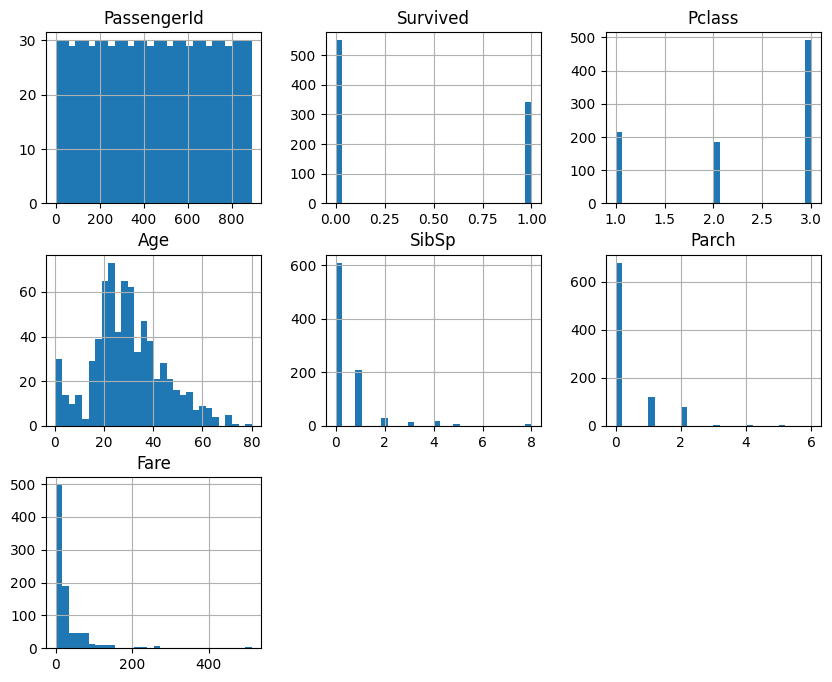

In [ ]:
# Plot histograms
train_df.hist(bins=30, figsize=(10, 8))
plt.show()

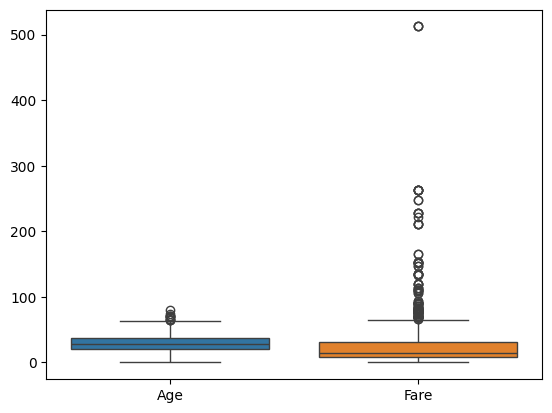

In [ ]:
# Box plot for outliers
sns.boxplot(data=train_df[['Age', 'Fare']])
plt.show()

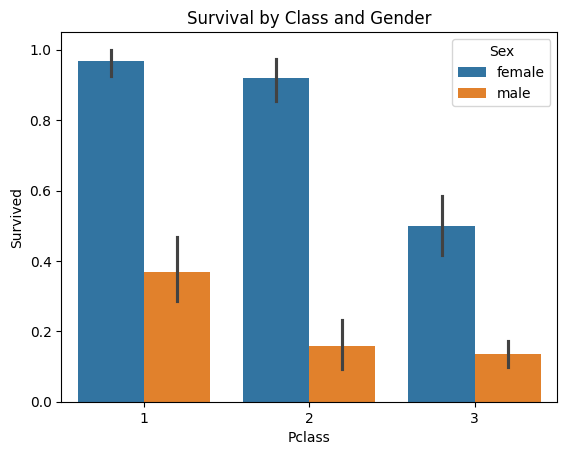

In [ ]:
# Bar plot of Survival by Pclass and Sex
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df)
plt.title('Survival by Class and Gender')
plt.show()

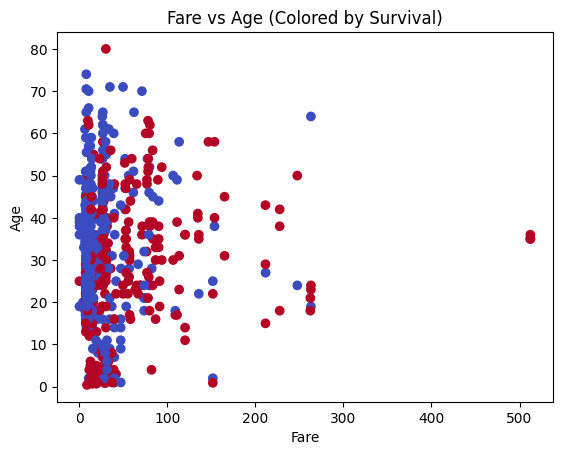

In [ ]:
# Scatter plot for Fare vs Age colored by Survival
plt.scatter(train_df['Fare'], train_df['Age'], c=train_df['Survived'], cmap='coolwarm')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare vs Age (Colored by Survival)')
plt.show()

In [ ]:
# Impute Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

<ipython-input-12-ad9b718a5df2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-12-ad9b718a5df2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Impute Embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

<ipython-input-13-2cb16a83f2ac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [ ]:
 #Impute Fare in test set with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

<ipython-input-14-d133a70098dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [ ]:
# One-hot encoding for categorical columns
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [ ]:
# Predict and evaluate
lgb_pred = lgb_model.predict(X_val)
print(f"LightGBM Accuracy: {accuracy_score(y_val, lgb_pred)}")
print(f"LightGBM Precision: {precision_score(y_val, lgb_pred)}")
print(f"LightGBM Recall: {recall_score(y_val, lgb_pred)}")
print(f"LightGBM F1-Score: {f1_score(y_val, lgb_pred)}")

LightGBM Accuracy: 0.8268156424581006
LightGBM Precision: 0.7945205479452054
LightGBM Recall: 0.7837837837837838
LightGBM F1-Score: 0.7891156462585034


In [ ]:
import xgboost as xgb

In [ ]:
# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict and evaluate
xgb_pred = xgb_model.predict(X_val)
print(f"XGBoost Accuracy: {accuracy_score(y_val, xgb_pred)}")
print(f"XGBoost Precision: {precision_score(y_val, xgb_pred)}")
print(f"XGBoost Recall: {recall_score(y_val, xgb_pred)}")
print(f"XGBoost F1-Score: {f1_score(y_val, xgb_pred)}")

XGBoost Accuracy: 0.8212290502793296
XGBoost Precision: 0.8
XGBoost Recall: 0.7567567567567568
XGBoost F1-Score: 0.7777777777777778


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Example of hyperparameter tuning for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Best parameters and accuracy
grid_search.best_params_
grid_search.best_score_

0.8300305328474342

In [ ]:
print(f"LightGBM Accuracy: {accuracy_score(y_val, lgb_pred)}")
print(f"XGBoost Accuracy: {accuracy_score(y_val, xgb_pred)}")
# Similarly for precision, recall, F1-score

LightGBM Accuracy: 0.8268156424581006
XGBoost Accuracy: 0.8212290502793296


In [ ]:
# Bar plot comparing accuracy of LightGBM and XGBoost
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_val, lgb_pred), accuracy_score(y_val, xgb_pred)],
    'Precision': [precision_score(y_val, lgb_pred), precision_score(y_val, xgb_pred)],
    'Recall': [recall_score(y_val, lgb_pred), recall_score(y_val, xgb_pred)],
    'F1-Score': [f1_score(y_val, lgb_pred), f1_score(y_val, xgb_pred)]
})

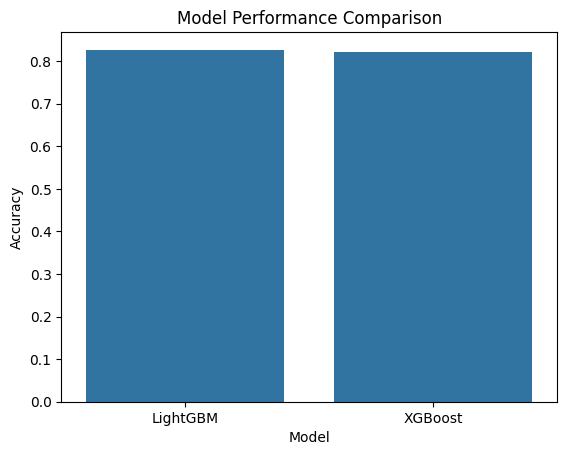

In [ ]:
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Performance Comparison')
plt.show()